# Example of Pressure-Deflection Diagram

In [1]:
from pygasflow.solvers import print_oblique_shockwave_results
from pygasflow.shockwave import PressureDeflectionLocus
from pygasflow.interactive import PressureDeflectionDiagram
from bokeh.plotting import output_notebook
output_notebook()

# helper function to print results at a particular region
def print_quantities(label, results):
    print(f"M{label} = {results["M"]}")
    print(f"T{label} = {results["T"]} K")
    print(f"p{label} = {results["p"]} atm")
    print(f"rho{label} = {results["rho"]} kg/m^3")
    print(f"p0{label} = {results["p0"]} atm")
    print(f"T0{label} = {results["T0"]} K")
    print()

# helper function to print the angles of a shockwave 
def print_shock(label, results):
    print(f"Shock {label}")
    print(f"theta = {results["theta"]}")
    print(f"beta = {results["beta"]}")
    print()

Loading BokehJS ...

## Regular reflection from a solid boundary

### Example 4.10 - 4.12(a)

Example 4.10 from *Modern Compressible Flow: with historical perspective, J.D. Anderson*.

The following figure depicts the phenomena (image curtesy of [MAE 5420 - Compressible Fluid Flow - Section 9.1](http://mae-nas.eng.usu.edu/MAE_5420_Web/section9/section9.1.pdf)):

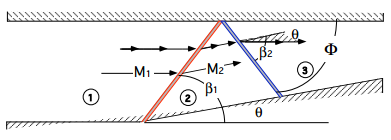

Compute $M_3, \, p_3, \, p_{03}, \, T_3, \, \Phi$ starting from known upstream conditions.

In [2]:
# Known data
gamma = 1.4
M1 = 2.8
theta1 = 16      # deg (positive because it creates a left running shock wave)
T1 = 519         # °R
p1 = 1           # atm
rho1 = 1.225     # kg/m^3

# Locus of all possible static pressure values behind
# the oblique shock wave for the given upstream conditions.
l1 = PressureDeflectionLocus(M=M1, gamma=gamma, label="1")
# first shock wave starting from the upstream condition,
# which creates a new locus
l2 = l1.new_locus_from_shockwave(theta1, label="2")

# Flow quantities in region 1
res1 = l1.flow_quantities_at_locus_origin(p1, T1, rho1)
print_quantities("1", res1)

# first shock wave
shock1 = l1.shockwave_at_theta(theta1)
# Note that beta1, theta1 are relative to the streamline upstream
# of the first shockwave
print("First shock wave:")
print(f"theta1 = {shock1["theta"]} deg")
print(f"beta1 = {shock1["beta"]} deg\n")

# Flow quantities in region 2
res2 = l2.flow_quantities_at_locus_origin(p1, T1, rho1)
print_quantities("2", res2)

# second shock wave
# The flow in region 3 is parallel to the upper wall, which
# itself is parallel to the bottom wall of region 1. So, the
# final flow deflection angle is:
theta3 = 0
shock2 = l2.shockwave_at_theta(theta3)
p3_p1 = shock2["pr"]
# Note that beta2, theta2 are relative to the streamline upstream
# of the second shockwave
beta2 = shock2["beta"]
theta2 = shock2["theta"]
phi = beta2 - theta2

print("Second shock wave:")
print(f"theta2 = {shock1["theta"]} deg")
print(f"beta2 = {shock1["beta"]} deg")
print("Shock wave angle relative to the upper wall:")
print(f"phi = {phi} deg\n")

# Flow quantities in region 3
res3 = l2.flow_quantities_after_shockwave(0, p1, T1, rho1)
print_quantities("3", res3)

# initialize the diagram
d = PressureDeflectionDiagram()
d.add_locus(l1)
d.add_locus(l2)
# add a path highlighting the flow direction
l, arrows = d.add_path((l1, theta1), (l2, theta3))
d.add_state(theta3, p3_p1, "3")
# further customize the diagram
d.move_legend_outside()
d.y_range = (0, 14)
d.show_figure()

M1 = 2.8
T1 = 519 K
p1 = 1 atm
rho1 = 1.225 kg/m^3
p01 = 27.13829555269978 atm
T01 = 1332.7919999999997 K

First shock wave:
theta1 = 16 deg
beta1 = 34.9226304011263 deg

M2 = 2.0585267649107384
T2 = 721.4004347373847 K
p2 = 2.830893893824571 atm
rho2 = 2.49488561231809 kg/m^3
p02 = 24.26467588950667 atm
T02 = 1332.7919999999997 K

Second shock wave:
theta2 = 16 deg
beta2 = 34.9226304011263 deg
Shock wave angle relative to the upper wall:
phi = 61.33424941323747 deg

M3 = 1.457847510395878
T3 = 935.2507108767023 K
p3 = 6.607497448853544 atm
rho3 = 4.491717185231501 kg/m^3
p03 = 22.82743737842192 atm
T03 = 1332.7919999999997 K



### Example 4.11

Example 4.11 from *Modern Compressible Flow: with historical perspective, J.D. Anderson*.

The following figure depicts the phenomena:

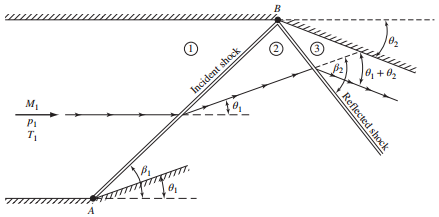

Compute $M_3, \, p_3, \, T_3$ starting from known upstream conditions.

In [3]:
M1 = 3
gamma = 1.4
p1 = 1           # atm
T1 = 300         # K
rho1 = 1.176024  # kg/m^3
theta1 = 14      # deg (positive because it creates a left running shock wave)
theta2 = -10     # deg (negative because it creates a right running shock wave)

l1 = PressureDeflectionLocus(M=M1, gamma=gamma, label="1")
l2 = l1.new_locus_from_shockwave(theta1, label="2")

print_quantities("1", l1.flow_quantities_at_locus_origin(p1, T1, rho1))
shock1 = l1.shockwave_at_theta(theta1)
print("First shock wave:")
print(f"theta1 = {shock1["theta"]} deg")
print(f"beta1 = {shock1["beta"]} deg\n")
print_quantities("2", l2.flow_quantities_at_locus_origin(p1, T1, rho1))

# in region 3, the flow is parallel to the inclined wall,
# so the flow deflection angle is theta2
shock2 = l2.shockwave_at_theta(theta2)
p3_p1 = shock2["pr"]
print("Second shock wave:")
print(f"theta2 = {shock2["theta"]} deg")
print(f"beta2 = {shock2["beta"]} deg\n")
print_quantities("3", l2.flow_quantities_after_shockwave(theta2, p1, T1, rho1))

d = PressureDeflectionDiagram()
d.add_locus(l1)
d.add_locus(l2)
l, arrows = d.add_path((l1, theta1), (l2, theta2))
d.add_state(theta2, p3_p1, "3")
d.move_legend_outside()
d.y_range = (0, 14)
d.show_figure()

M1 = 3
T1 = 300 K
p1 = 1 atm
rho1 = 1.176024 kg/m^3
p01 = 36.732721804952064 atm
T01 = 840.0 K

First shock wave:
theta1 = 14 deg
beta1 = 31.218449772448846 deg

M2 = 2.3056470677420506
T2 = 407.1342167187402 K
p2 = 2.654025993768989 atm
rho2 = 2.299879108995936 kg/m^3
p02 = 33.48120360251564 atm
T02 = 840.0 K

Second shock wave:
theta2 = -24 deg
beta2 = 52.39999512691948 deg

M3 = 1.2838541288898662
T3 = 631.7422100498266 K
p3 = 9.890164888691734 atm
rho3 = 5.523331077786356 kg/m^3
p03 = 26.809665758819268 atm
T03 = 840.0 K



## Intersection of shocks of opposite families

Here I reproduce figure 4.24 from *Modern Compressible Flow: with historical perspective, J.D. Anderson* using data from [MAE 5420 - Compressible Fluid Flow - Section 9.1](http://mae-nas.eng.usu.edu/MAE_5420_Web/section9/section9.1.pdf).

The problem is depicted in this picture:

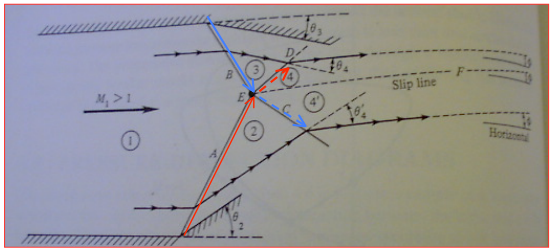

In [4]:
M1 = 3
theta_2 = 20
theta_3 = -15
p1 = 1   # atm
T1 = 300 # K
rho1 = 1.176024  # kg/m^3

l1 = PressureDeflectionLocus(M=M1, label="1")
l2 = l1.new_locus_from_shockwave(theta_2, label="2")
l3 = l1.new_locus_from_shockwave(theta_3, label="3")

phi, p4_p1 = l2.intersection(l3)
theta_4 = phi - l3.theta_origin
theta_4p = phi - l2.theta_origin
print("Intersection between locus M2 and locus M3 happens at:")
print("Deflection Angle [deg]:", phi)
print("Pressure ratio to freestream:", p4_p1)
print()
print("From geometry:")
print("theta_4 [deg] =", theta_4)
print("theta_4' [deg] =", theta_4p)

d = PressureDeflectionDiagram()
d.add_locus(l1)
d.add_locus(l2)
d.add_locus(l3)
d.add_path((l1, theta_2), (l2, phi))
d.add_path((l1, theta_3), (l3, phi))
d.add_state(
    phi, p4_p1, "4=4'", 
    background_fill_color="white",
    background_fill_alpha=0.8)
d.move_legend_outside()
d.y_range = (0, 18)
d.show_figure()

Intersection between locus M2 and locus M3 happens at:
Deflection Angle [deg]: 4.795958931693682
Pressure ratio to freestream: 8.352551913417367

From geometry:
theta_4 [deg] = 19.795958931693683
theta_4' [deg] = -15.204041068306317


In [5]:
print_quantities("1", l1.flow_quantities_at_locus_origin(p1, T1, rho1))
print_quantities("2", l2.flow_quantities_at_locus_origin(p1, T1, rho1))
print_quantities("3", l3.flow_quantities_at_locus_origin(p1, T1, rho1))
print_quantities("4'", l2.flow_quantities_after_shockwave(phi, p1, T1, rho1))
print_quantities("4", l3.flow_quantities_after_shockwave(phi, p1, T1, rho1))

M1 = 3
T1 = 300 K
p1 = 1 atm
rho1 = 1.176024 kg/m^3
p01 = 36.732721804952064 atm
T01 = 840.0 K

M2 = 1.9941316534570679
T2 = 467.8851904861145 K
p2 = 3.771257463082658 atm
rho2 = 2.8437035689181145 kg/m^3
p02 = 29.23991654725333 atm
T02 = 840.0 K

M3 = 2.2549022859400836
T3 = 416.47725058784755 K
p3 = 2.8215623212774954 atm
rho3 = 2.3902085907221466 kg/m^3
p03 = 32.877413016079274 atm
T03 = 840.0 K

M4' = 1.431700680823202
T4' = 595.7643842184121 K
p4' = 8.352551913417951 atm
rho4' = 4.9463185975670765 kg/m^3
p04' = 27.79942454162213 atm
T04' = 840.0 K

M4 = 1.4605040215769651
T4 = 588.8066182062091 K
p4 = 8.352551913417367 atm
rho4 = 5.004767885260751 kg/m^3
p04 = 28.966251347940943 atm
T04 = 840.0 K



In [6]:
# Note: the flow deflection angle returned in the following
# commands are relative to the streamline upstream of the
# schockwave.
print_shock("A", l1.shockwave_at_theta(theta_2))
print_shock("B", l1.shockwave_at_theta(theta_3))
print_shock("C", l2.shockwave_at_theta(phi))
print_shock("D", l3.shockwave_at_theta(phi))

Shock A
theta = 20
beta = 37.76363414837576

Shock B
theta = -15
beta = 32.24040018274467

Shock C
theta = -15.204041068306317
beta = 45.763301527634496

Shock D
theta = 19.795958931693683
beta = 46.5550175823021



## Intersection of shocks of the same family

The following example consider a case in which the upstream condition and the geometry produces a weak reflected shock, D.

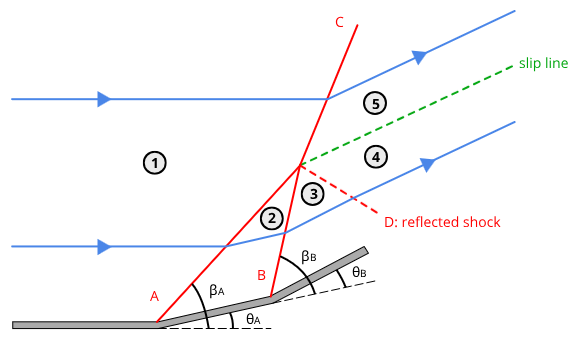

This example was verified against an example from [UnDiFi-2D: an Unstructured Discontinuity Fitting code for 2D grids](https://www.researchgate.net/publication/355385826_UnDiFi-2D_an_Unstructured_Discontinuity_Fitting_code_for_2D_grids) and with [an applet from NASA website](https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/mshock/).

In [7]:
M1 = 2
theta_A = 10
theta_B = 10

l1 = PressureDeflectionLocus(M=M1, label="1")
l2 = l1.new_locus_from_shockwave(theta_A, label="2")
l3 = l2.new_locus_from_shockwave(theta_B, label="3")

theta4, pr4 = l3.intersection(l1)

# Note: the printed values of beta, theta are relative to the streamline upstream
# of the shock wave
print_quantities("1", l1.flow_quantities_at_locus_origin(p1, T1, rho1))
print_shock("A", l1.shockwave_at_theta(theta_A))
print_quantities("2", l2.flow_quantities_at_locus_origin(p1, T1, rho1))
print_shock("B", l2.shockwave_at_theta(theta_A + theta_B))
print_quantities("3", l3.flow_quantities_at_locus_origin(p1, T1, rho1))
print_shock("C", l1.shockwave_at_theta(theta4))
print_quantities("5", l1.flow_quantities_after_shockwave(theta4, p1, T1, rho1))
print_shock("D", l3.shockwave_at_theta(theta4))
print_quantities("4", l3.flow_quantities_after_shockwave(theta4, p1, T1, rho1))

d = PressureDeflectionDiagram()
d.add_locus(l1)
d.add_locus(l2)
d.add_locus(l3)
d.add_path((l1, theta4))
d.add_path((l1, theta_A), (l2, theta_A + theta_B), (l3, theta4))
d.x_range = (-1, 21)
d.y_range = (0.8, 3)
d.move_legend_outside()
d.show_figure()

M1 = 2
T1 = 300 K
p1 = 1 atm
rho1 = 1.176024 kg/m^3
p01 = 7.824449066867263 atm
T01 = 540.0 K

Shock A
theta = 10
beta = 39.31393184481887

M2 = 1.6405222290010815
T2 = 351.0453852887631 K
p2 = 1.706578604000033 atm
rho2 = 1.7151435230002816 kg/m^3
p02 = 7.704297003073412 atm
T02 = 540.0 K

Shock B
theta = 10
beta = 49.38404168280173

M3 = 1.2848893067551757
T3 = 405.9576194587229 K
p3 = 2.803190544301614 atm
rho3 = 2.4361799350389743 kg/m^3
p03 = 7.609363492952377 atm
T03 = 540.0 K

Shock C
theta = 19.867224656873546
beta = 53.154170070126035

M5 = 1.2176500171480953
T5 = 416.4949547783993 K
p5 = 2.8218816419900694 atm
rho5 = 2.3903774809748364 kg/m^3
p05 = 7.002979359420675 atm
T05 = 540.0 K

Shock D
theta = -0.132775343126454
beta = 51.30619511635541

M4 = 1.2799702915754052
T4 = 406.72917161443337 K
p4 = 2.8218816419906316 atm
rho4 = 2.447771712292858 kg/m^3
p04 = 7.609363413316369 atm
T04 = 540.0 K

